In [259]:
#importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [260]:
#importing or loading the dataset
df = pd.read_csv('census.csv')
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


Problem Statement:


This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.
Description of fnlwgt (final weight)

The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

    A single cell estimate of the population 16+ for each state.

    Controls for Hispanic Origin by age and sex.

    Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

Explainations regarding feature columns in dataset:

age: continuous, is numerical & discrete kind of data which can be considered as continuous variable. Since age is generally continuous in nature, which is rounded off to get into integral form

workclass: categorical data. Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

fnlwgt: continuous. he weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US

education: this is categorical & ordinal kind of data. Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

education-num: numerical data.

marital-status: categorical data. Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.


occupation: categorical-nominal data. Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

relationship: categorical and nominal data. Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

race: categorical and nominal data. White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

sex: categorical and nominal data. Female, Male.

capital-gain: numerical data.

capital-loss: numerical data.

hours-per-week: numerical data.

native-country: Ctegorical & nominal data. United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

Target feature is "Income" of categorical in nature which need to be predicted whether a person makes over $50K a year or not

In [261]:
#Checking for data shape
df.shape

(32560, 15)

In [262]:
#Checking data types
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [263]:
#Checking any null values
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [264]:
#Checking any blank or white spaces
np.where(df.applymap(lambda x: x == ' '))

(array([], dtype=int64), array([], dtype=int64))

In [265]:
#Checking if all entries of a column is unique or not
for i in df.columns:
    print('For column of {} :'.format(i),(len(df[i].unique())==len(df[i])))

For column of Age : False
For column of Workclass : False
For column of Fnlwgt : False
For column of Education : False
For column of Education_num : False
For column of Marital_status : False
For column of Occupation : False
For column of Relationship : False
For column of Race : False
For column of Sex : False
For column of Capital_gain : False
For column of Capital_loss : False
For column of Hours_per_week : False
For column of Native_country : False
For column of Income : False


No entries in a particular column are completely unique in all columns.

In [266]:
#Removing duplicate rows if any
print('Size before: ',df.shape)
df.drop_duplicates()
print('Size after: ',df.shape)

Size before:  (32560, 15)
Size after:  (32560, 15)


In [267]:
#General information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [268]:
#Checking of value counts in each columns of dataset
for i in df:
    print(df[i].value_counts(),'\n')

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
85      3
88      3
86      1
87      1
Name: Age, Length: 73, dtype: int64 

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64 

203488    13
123011    13
164190    13
121124    12
148995    12
          ..
218551     1
201204     1
362999     1
162297     1
145522     1
Name: Fnlwgt, Length: 21647, dtype: int64 

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype

Observe that Occupation has 1834 entries as '?'

Work class has 1836 entries as '?'

Native_country has 583 entries as '?'

As dataset is very huge having 32560 entries in each columns

Let us impute mode in those places. This can be done by using simple imputer or manually by using replace function

In [269]:
#Imputing mode/most frequent values
df['Workclass'] = df['Workclass'].replace(" ?", df['Workclass'].mode()[0])
df['Occupation'] = df['Occupation'].replace(" ?", df['Occupation'].mode()[0])
df['Native_country'] = df['Native_country'].replace(" ?", df['Native_country'].mode()[0])

print(df['Workclass'].value_counts(),'\n')
print(df['Occupation'].value_counts(),'\n')
print(df['Native_country'].value_counts())

 Private             24532
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64 

 Prof-specialty       5983
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64 

 United-States                 29752
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England

In [270]:
#Using simple imputer
#from sklearn.impute import SimpleImputer
#imputer = SimpleImputer(missing_values= ' ?', strategy='most_frequent')

#df['Workclass'] = imputer.fit_transform(df['Workclass'].values.reshape(-1,1))[:,0]
#df['Occupation'] = imputer.fit_transform(df['Occupation'].values.reshape(-1,1))[:,0]

In [271]:
#Seperating data for vizualization purpose 
#Let us take multiclass categorical data more than 10 numerical class (orders) as discrete data for vizualization
numerical = df[['Age', 'Fnlwgt', 'Education_num','Capital_gain', 'Capital_loss', 'Hours_per_week']]
categorical = df[['Workclass', 'Education','Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex','Native_country']]
target = df[['Income']]

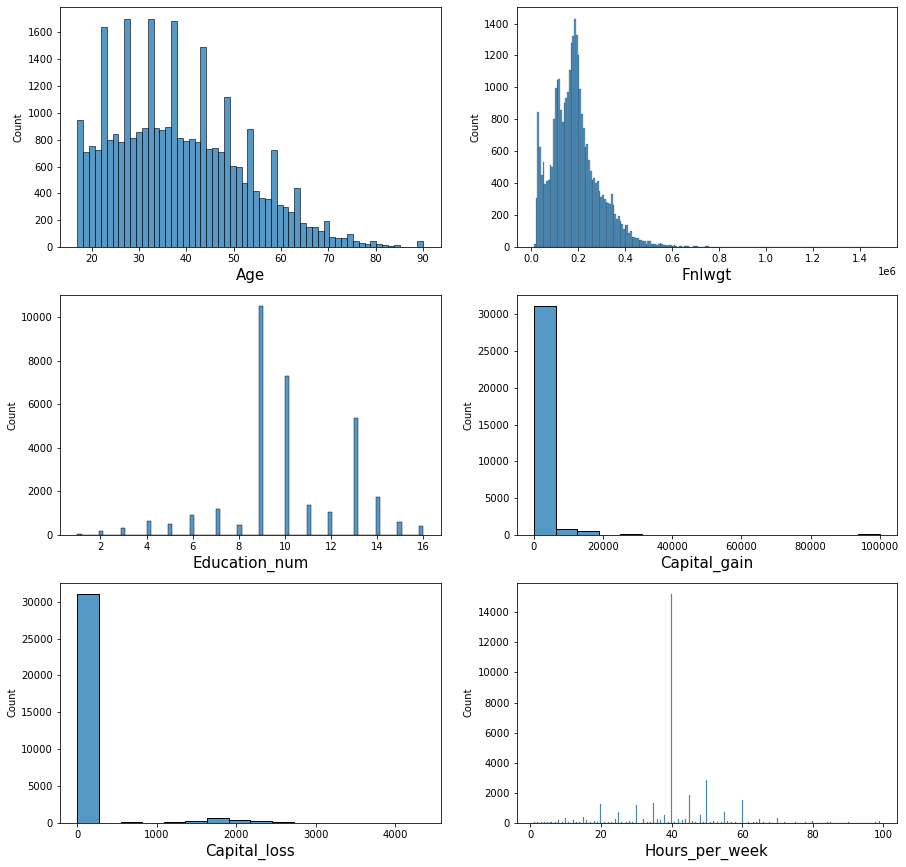

In [272]:
#Checking of histogram each columns having numerical data
plt.figure(figsize=(15,15))
pltno = 1
for columns in numerical:
    if pltno <=6:
        ax = plt.subplot(3,2,pltno)
        sns.histplot(numerical[columns])
        plt.xlabel(columns, fontsize=15)       
    pltno += 1
plt.show()

Let us observe these numerical data distributions using distplot

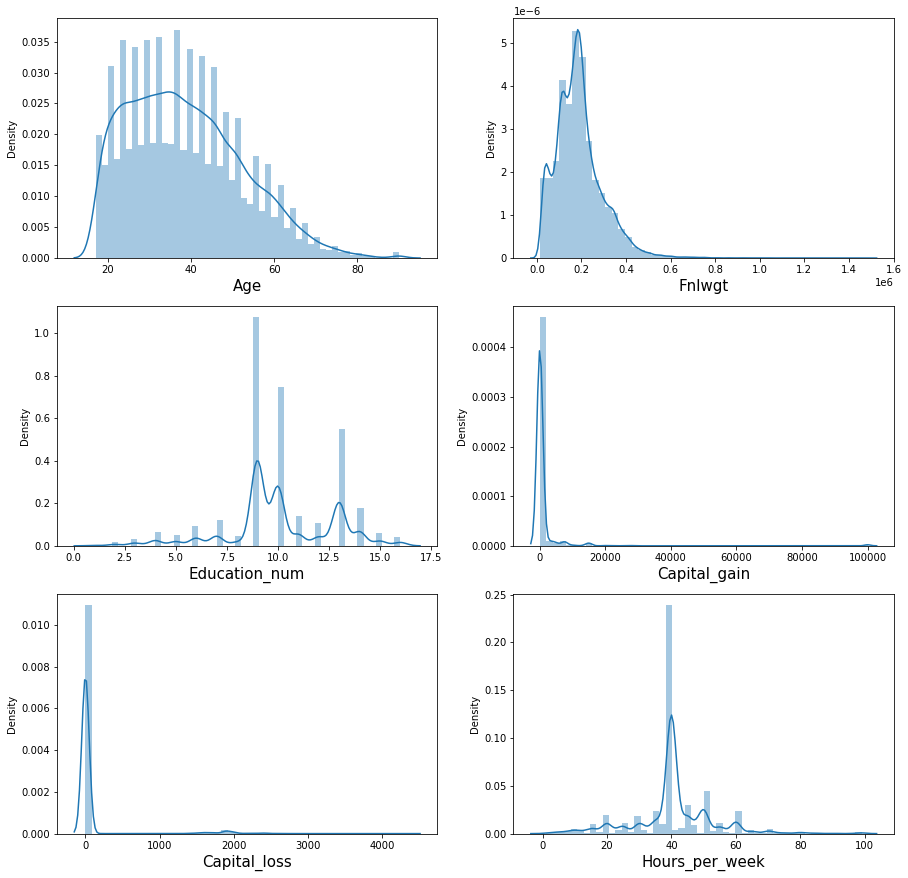

In [273]:
#Checking of distribution of numerical data
plt.figure(figsize=(15,15))
pltno = 1
for columns in numerical:
    if pltno <=6:
        ax = plt.subplot(3,2,pltno)
        sns.distplot(numerical[columns], kde=True)
        plt.xlabel(columns, fontsize=15)       
    pltno += 1
plt.show()

1) Age is little bit right skewed

2) Final weight is more right skewed

3) Capital gain and capital loss data are highly right skewed

4) Hrs/week and education num data are having sharp rise/peak at 40 and 8 respectively

Need to be properly normalized/transformed before training the model

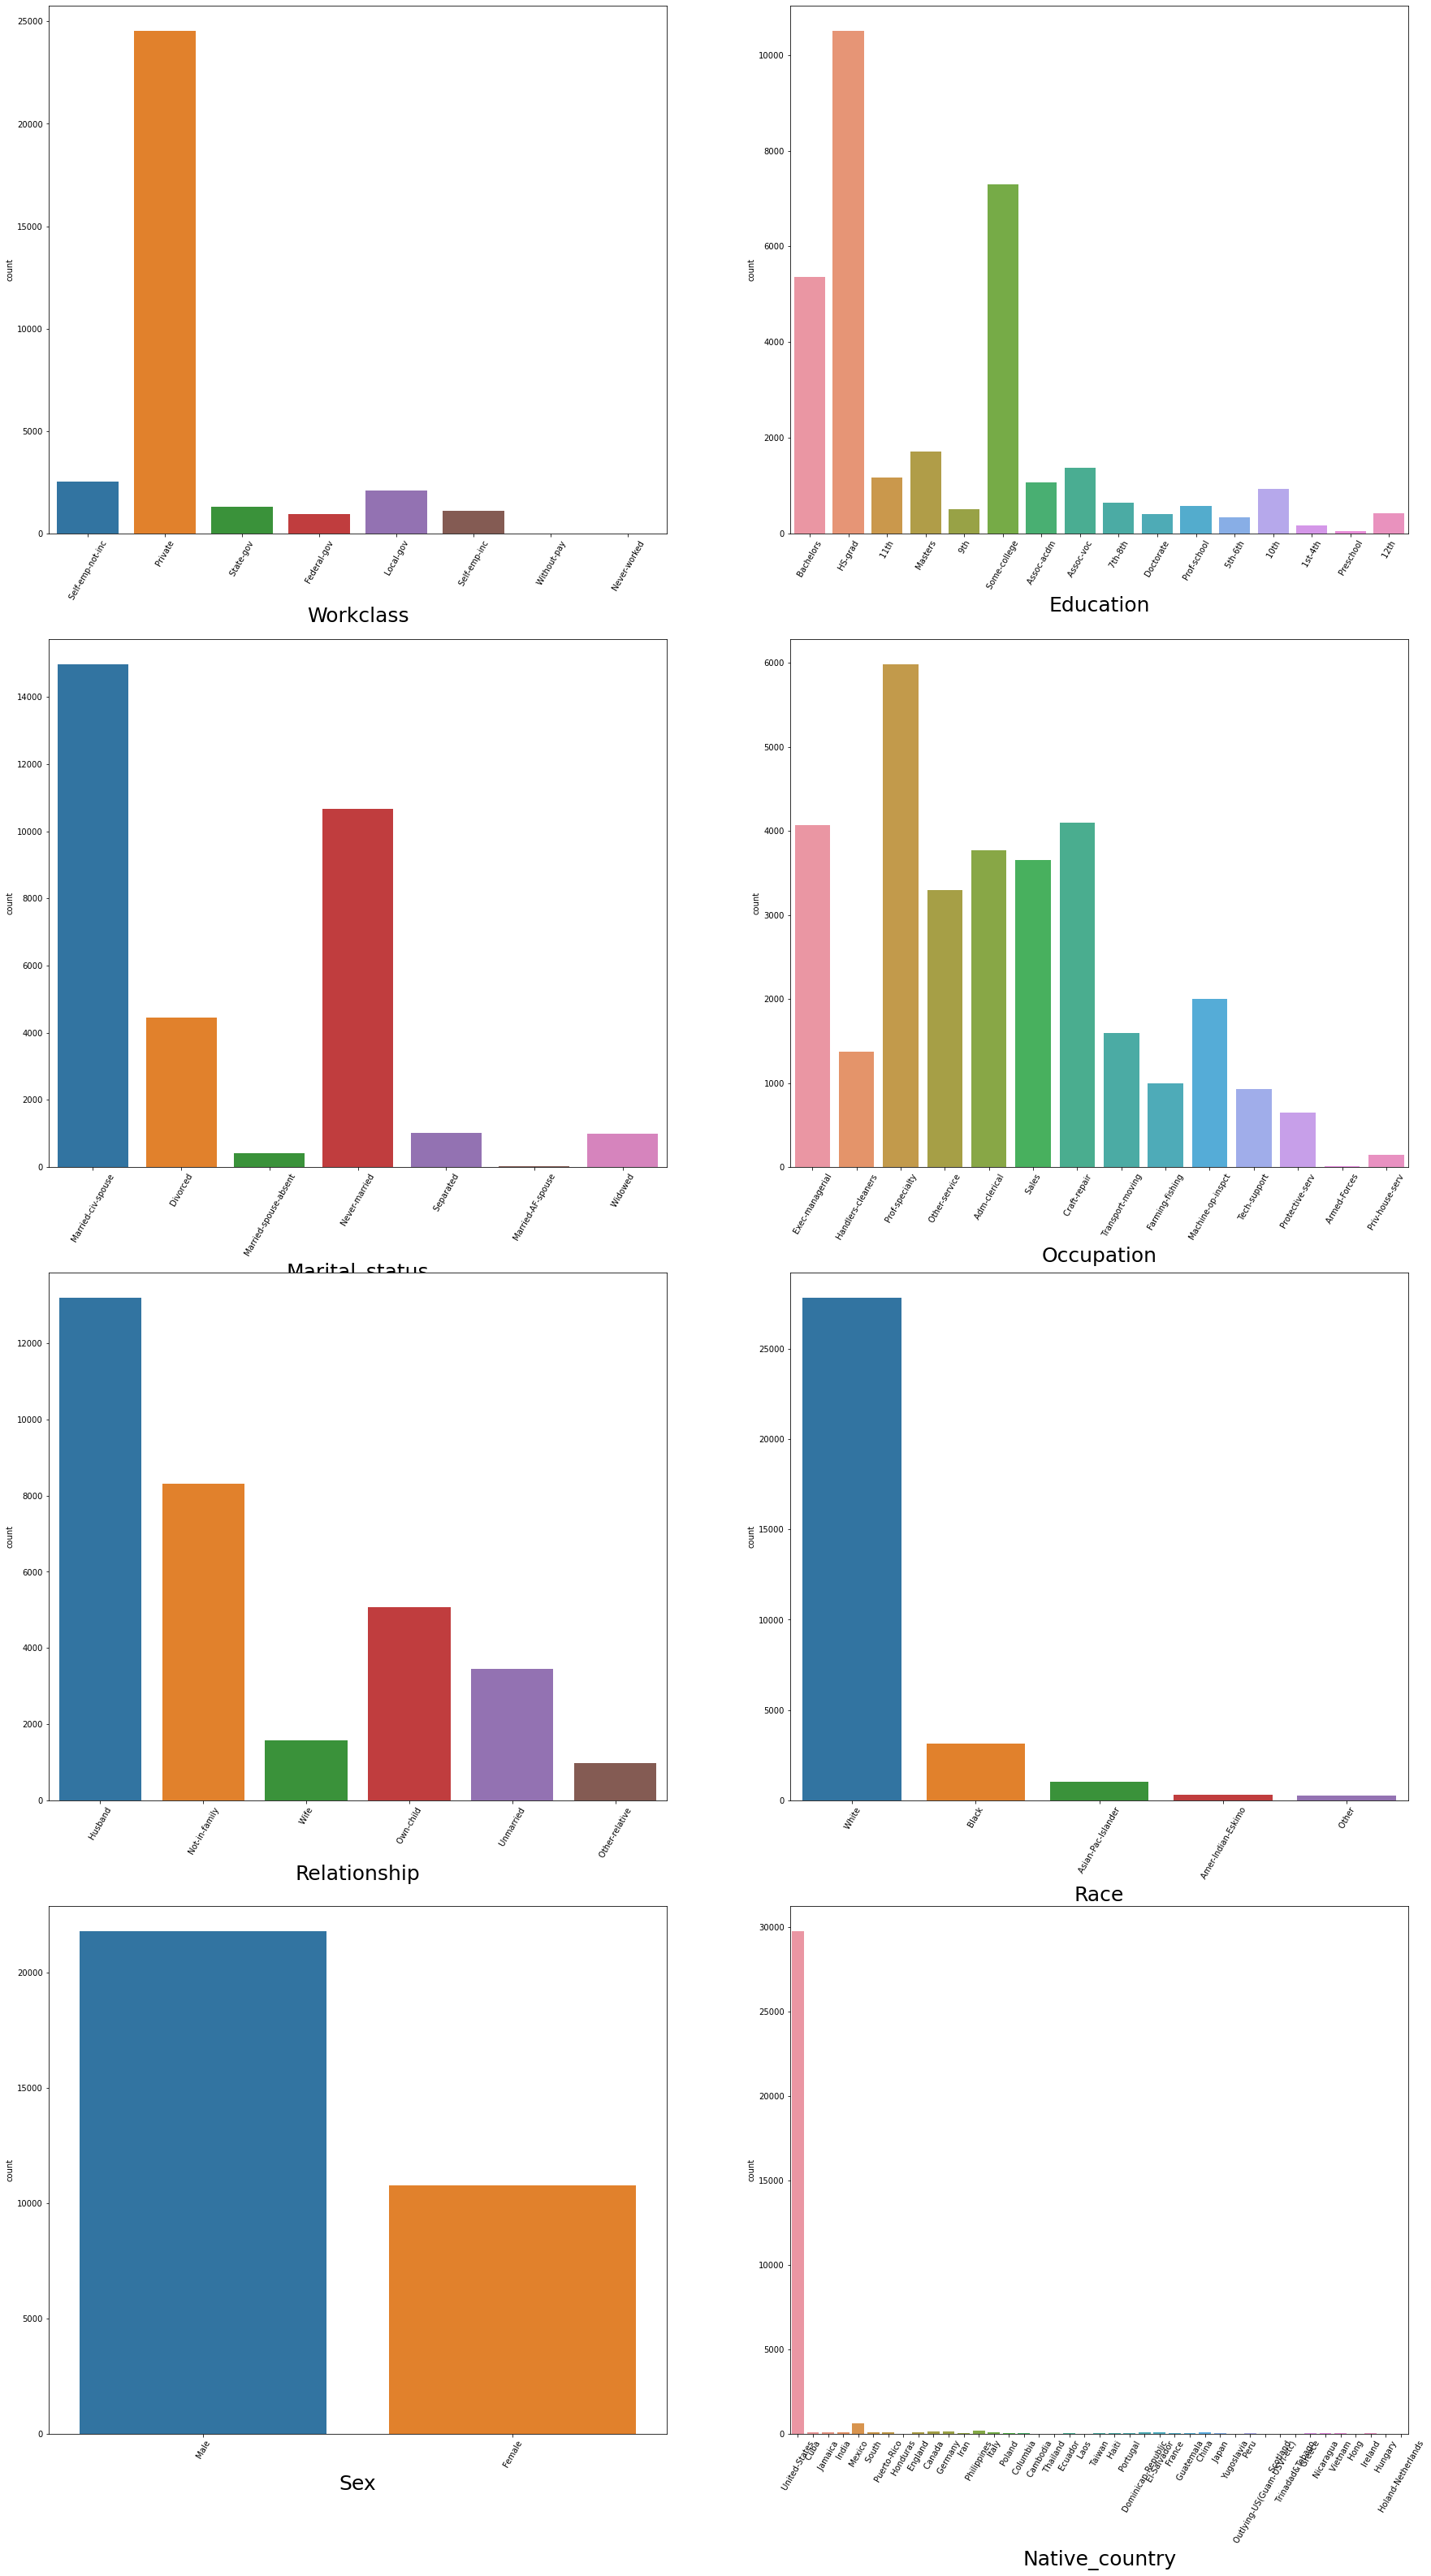

In [274]:
#Categorical
#Checking of value counts in each columns having categorical data
plt.figure(figsize=(30,55))
pltno = 1
for columns in categorical:
    if pltno <=8:
        ax = plt.subplot(4,2,pltno)
        sns.countplot(categorical[columns])
        plt.xlabel(columns, fontsize=25) 
        plt.xticks(rotation = 60)
    pltno += 1
plt.show()

1) Most of the people are woring in private companies

2) Majority of adults have completed HS grade, followed by some college

3) Majority of them are married

4) Majority of them are of White race

5) Proportion of Male is greater than that of feamale

6) Nearly 29000 of them belongs to US

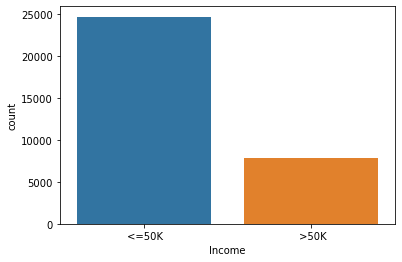

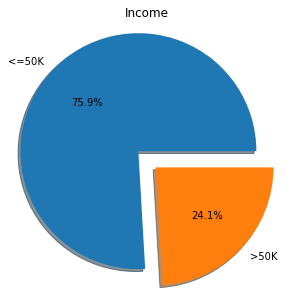

In [275]:
#Checking of value counts in target variable
sns.countplot(df['Income'])
plt.show()

var = 'Income'
plt.figure(figsize=(5,5))
data = list(df[var].value_counts())
plt.pie(data, labels= ['<=50K','>50K'], autopct='%1.1f%%', explode=[0.1,0.1], shadow=True)
plt.axis('equal')
plt.title(var)
plt.show()

Target data seems to be with 75:25 class ratio

Need to be balanced by proper sampling technique

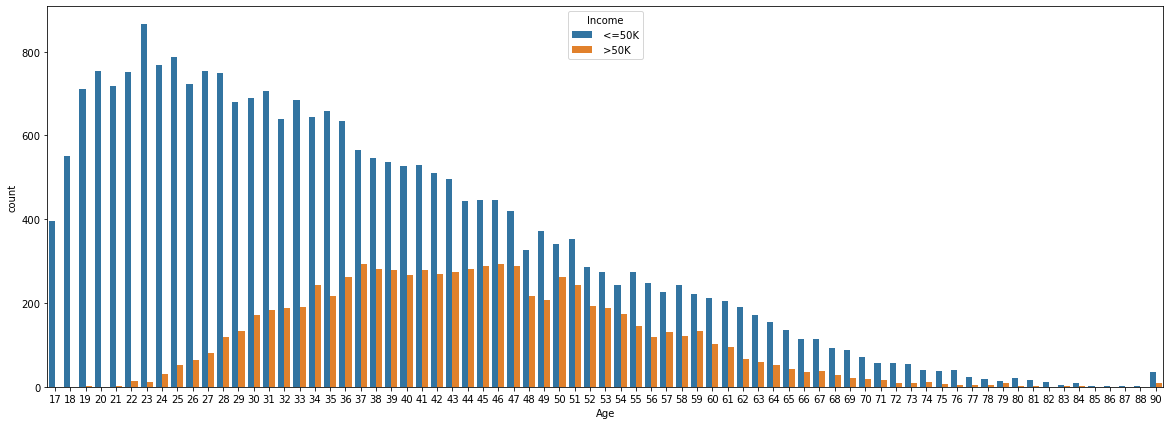

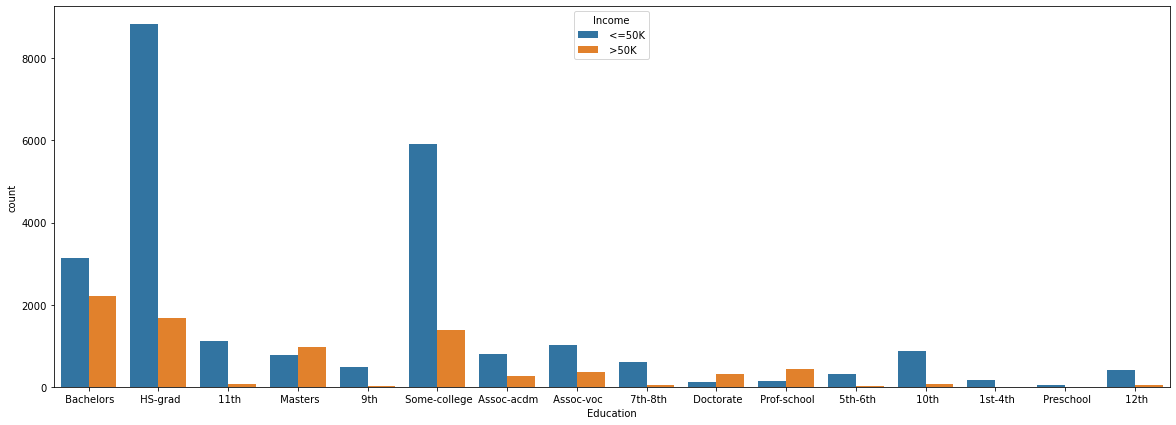

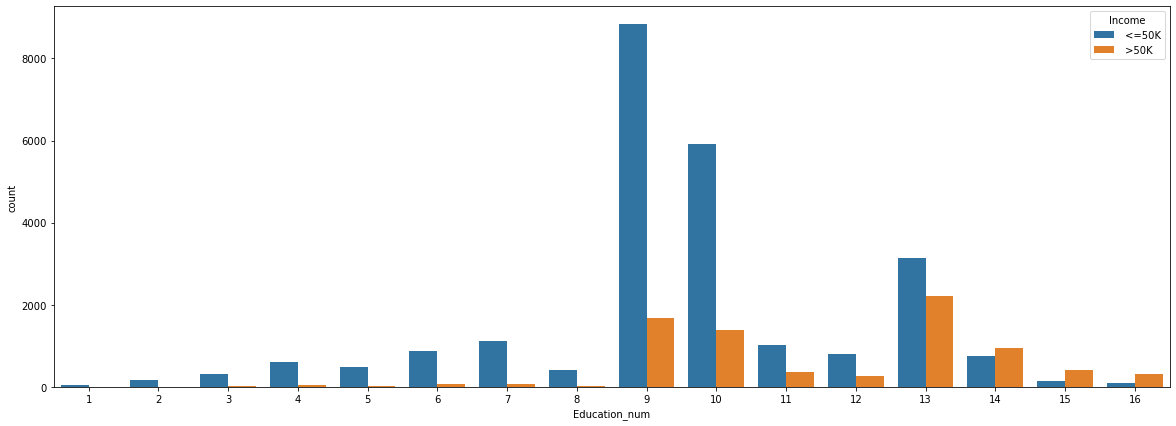

In [276]:
#Income distribution across different ages of people
plt.figure(figsize=(20, 7))
sns.countplot(df['Age'], hue=df['Income'])
plt.show()

#Income distribution across different educated of people
plt.figure(figsize=(20, 7))
sns.countplot(df['Education'], hue=df['Income'])
plt.show()

#Income distribution across different educated of people
plt.figure(figsize=(20, 7))
sns.countplot(df['Education_num'], hue=df['Income'])
plt.show()

Around the age of 25 years most of the people have salary less than 50

Among the number of people having salary >50K salary reached maximum value at age between 37 to 47 years and leater decreased

Most of the people getting paid less than 50K have studied for 9 years

Most of the people getting paid greater than 50K have studied for 13 years

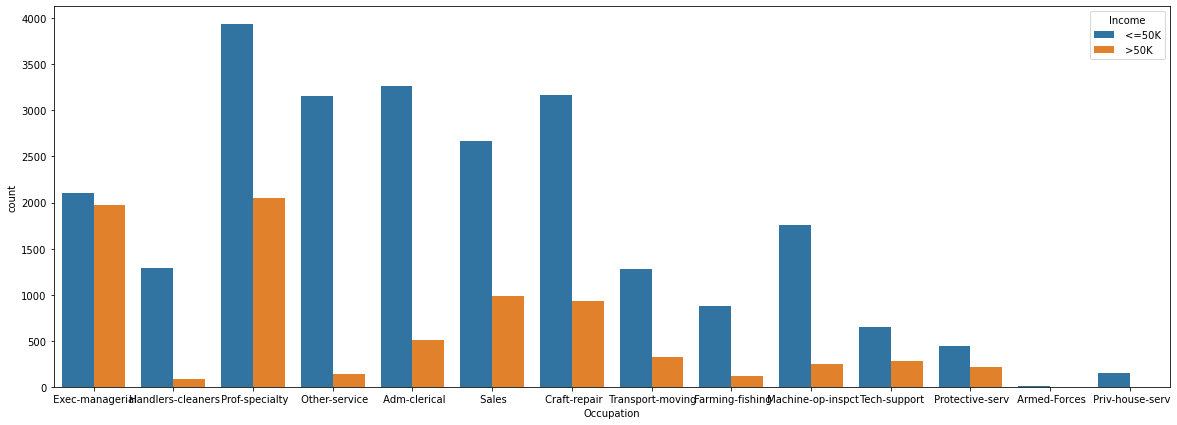

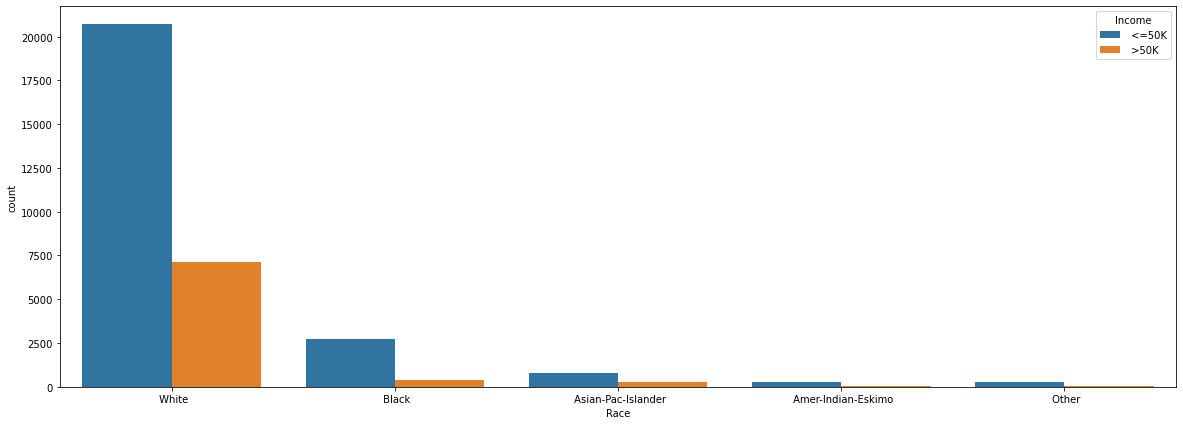

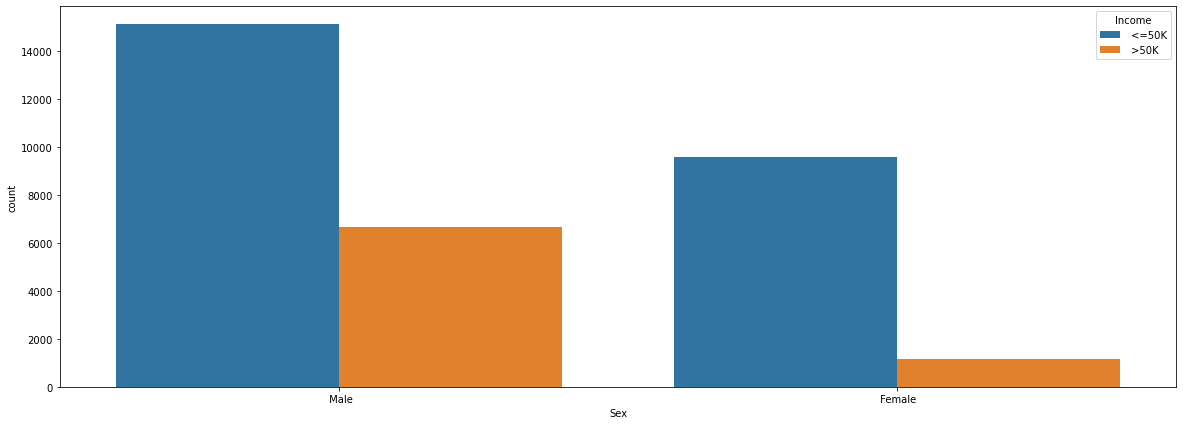

In [277]:
#Income distribution across different occupation
plt.figure(figsize=(20, 7))
sns.countplot(df['Occupation'], hue=df['Income'])
plt.show()

#Income distribution across different race
plt.figure(figsize=(20, 7))
sns.countplot(df['Race'], hue=df['Income'])
plt.show()

#Income distribution across different sex
plt.figure(figsize=(20, 7))
sns.countplot(df['Sex'], hue=df['Income'])
plt.show()

Since Male:female ratio is imalanced the last graph cannot be used for conslusion 

In [278]:
#Encoding the target data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Income'] = le.fit_transform(df['Income'])

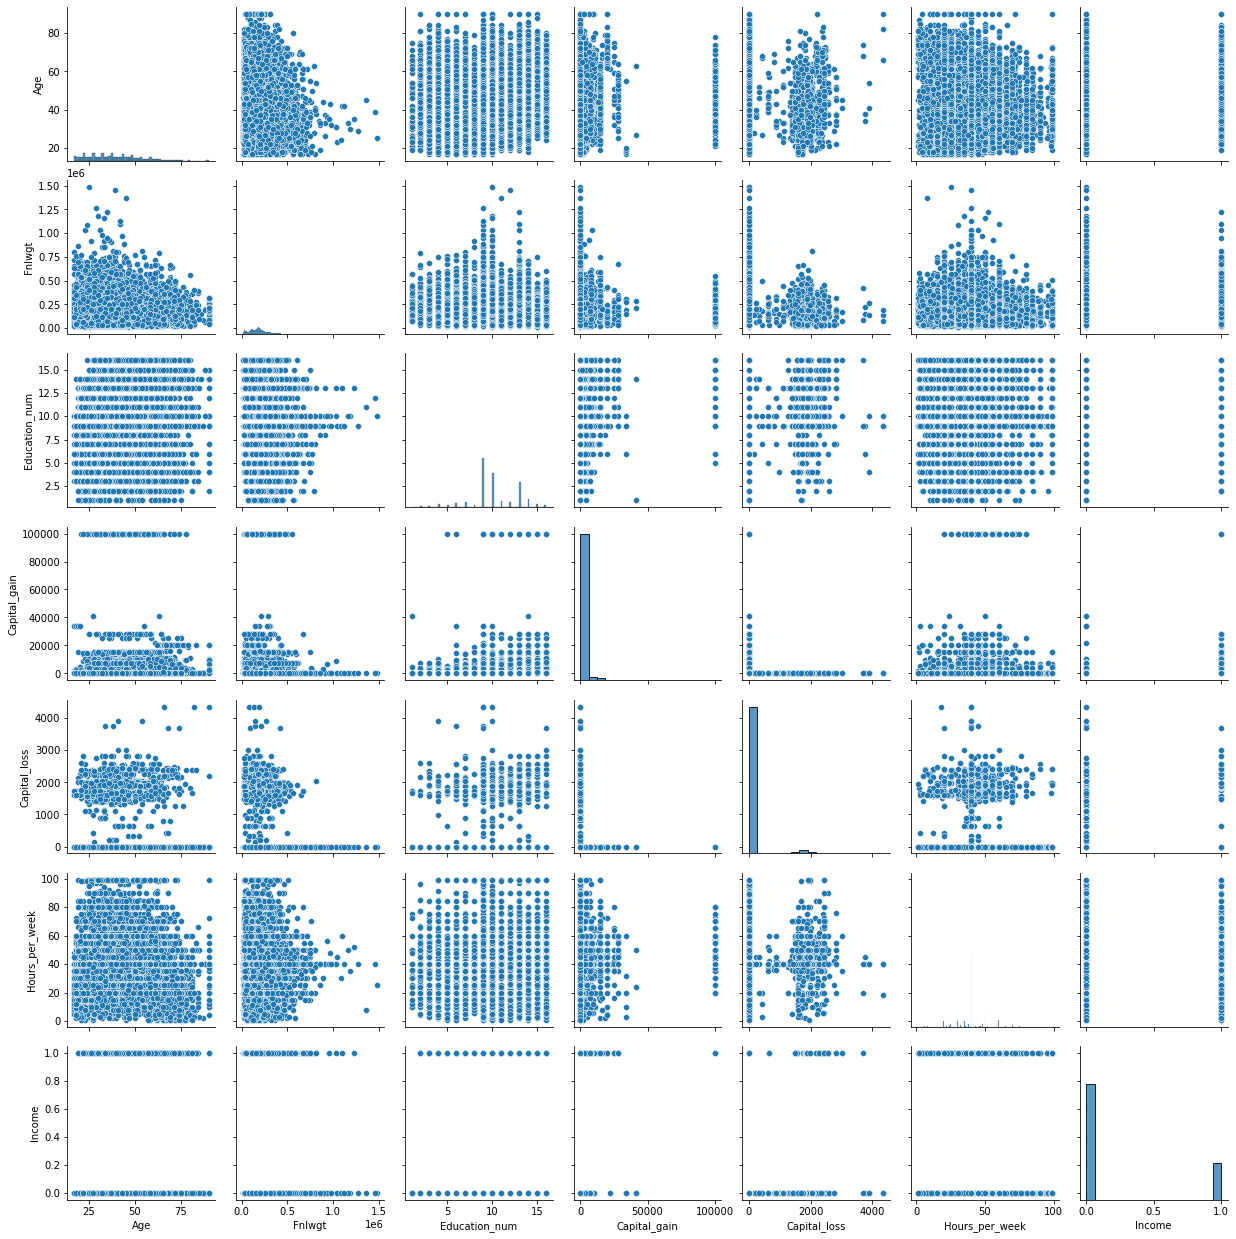

In [279]:
#Plotting all possible bivariate plots together
sns.pairplot(df)
plt.show()

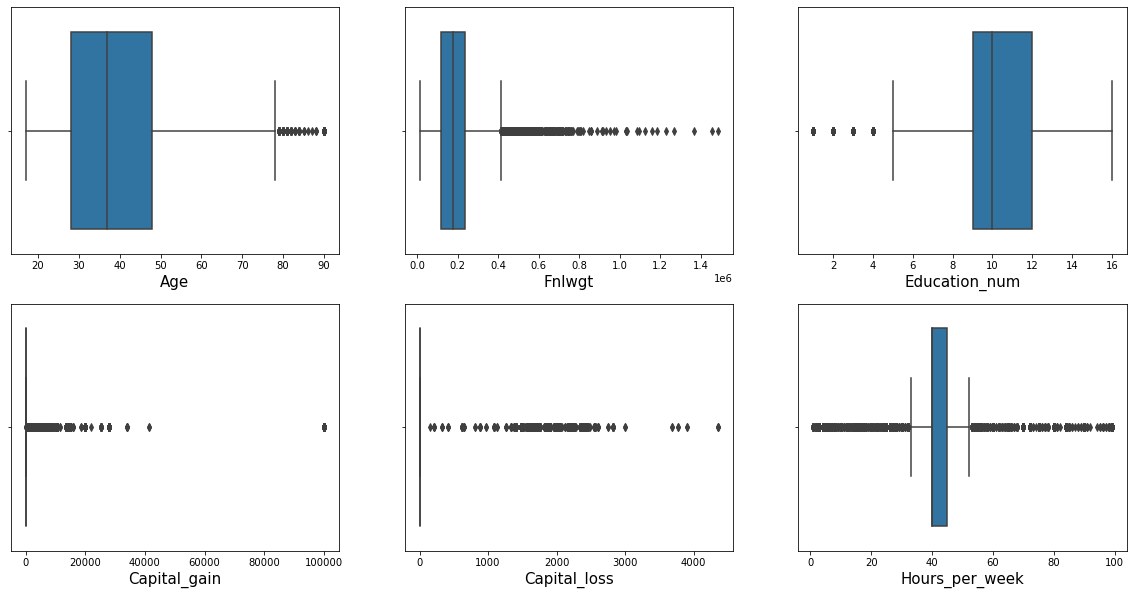

In [280]:
#Outliers/noise checking for input numerical feature columns
plt.figure(figsize=(20,10))
pltno = 1
for columns in numerical:
    if pltno <=6:
        ax = plt.subplot(2,3,pltno)
        sns.boxplot(x = numerical[columns])
        plt.xlabel(columns, fontsize=15)       
    pltno += 1
plt.show()

This outliers to be checked and removed before training the model

But most of the data are of discrete numerical type, no need to remove outliers by ZScore method. Let us simply scale that data and use

In [281]:
#Statistical summary of the data
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week,Income
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469,0.240817
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618,0.427586
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [282]:
#Coefficient of correlation matrix
df.corr()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week,Income
Age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756,0.234039
Fnlwgt,-0.076646,1.000000,-0.043159,0.000437,-0.010259,-0.018770,-0.009481
Education_num,0.036527,-0.043159,1.000000,0.122627,0.079932,0.148127,0.335182
Capital_gain,0.077674,0.000437,0.122627,1.000000,-0.031614,0.078409,0.223333
Capital_loss,0.057775,-0.010259,0.079932,-0.031614,1.000000,0.054256,0.150523
Hours_per_week,0.068756,-0.018770,0.148127,0.078409,0.054256,1.000000,0.229690
Income,0.234039,-0.009481,0.335182,0.223333,0.150523,0.229690,1.000000


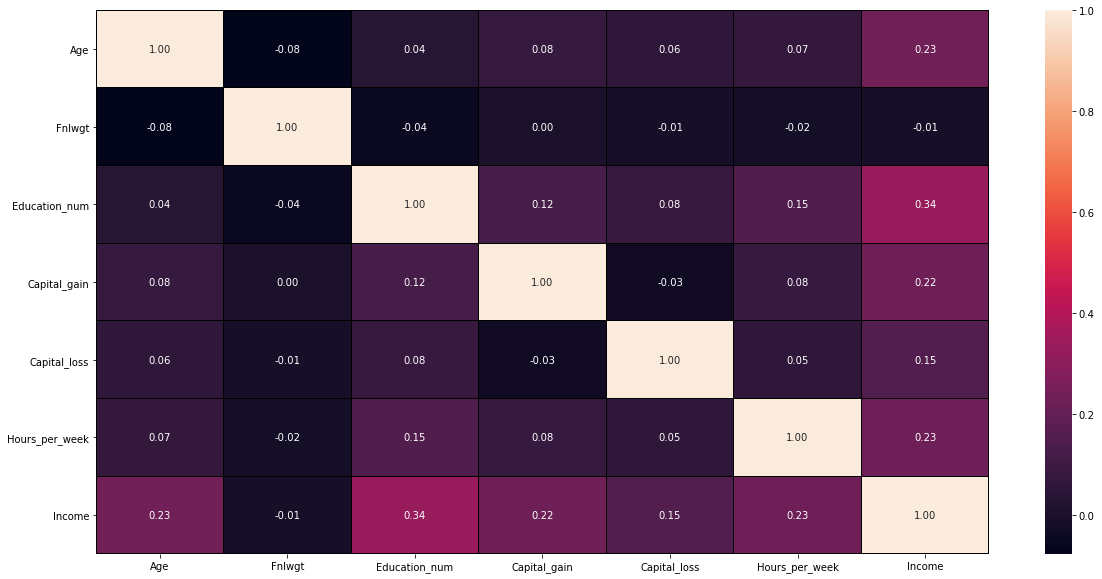

In [283]:
#Heatmap to vizualize correlation between different features
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, linewidths=0.1, linecolor='black', fmt='0.2f')
plt.show()

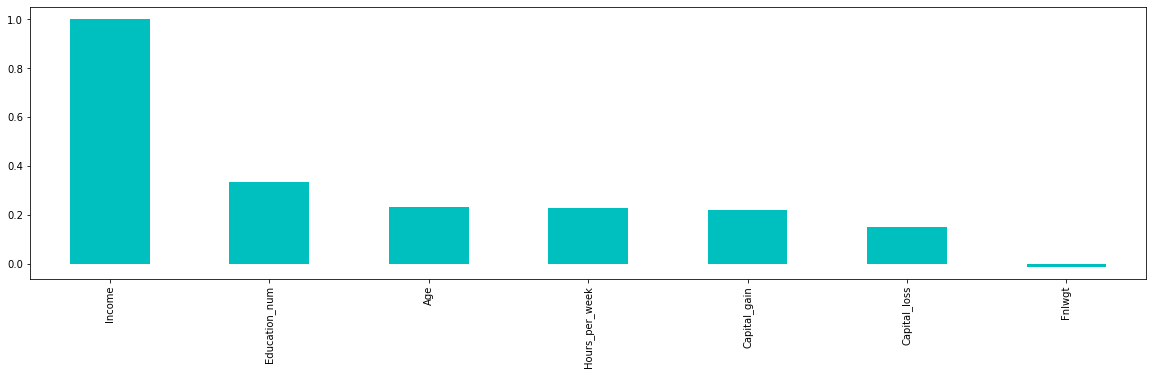

Income            1.000000
Education_num     0.335182
Age               0.234039
Hours_per_week    0.229690
Capital_gain      0.223333
Capital_loss      0.150523
Fnlwgt           -0.009481
Name: Income, dtype: float64

In [284]:
#Sorting descending values of correlation data of target variable
#Plotting the same for vizualization
plt.figure(figsize=(20,5))
df.corr()['Income'].sort_values(ascending=False).plot(kind='bar', color='c')
plt.show()

df.corr()['Income'].sort_values(ascending=False)

In this dataset, the most number of people are young, white, male, high school graduates with 9 to 10 years of education and work 40 hours per week.

From the correlation heatmap, we can see that the dependent feature 'income' is highly correlated with age, numbers of years of education, capital gain and number of hours per week.

In [285]:
#Encoding the categorical/text type data into numerical form
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
for i in df:
    if df[i].dtype == 'O':
        df[i] = enc.fit_transform(df[i])

In [286]:
#Removing of outliers by zscore method
print('Shape before',df.shape)
from scipy.stats import zscore
z=np.abs(zscore(df))
df_new = df[(z<3).all(axis=1)]
print('Shape after',df_new.shape)

#Percentage loss of data
loss = (df.shape[0]-df_new.shape[0])*100/(df.shape[0])
print(loss,'% loss of data')

Shape before (32560, 15)
Shape after (27770, 15)
14.711302211302211 % loss of data


This much data loss is not acceptable

But most of the data are of discrete numerical type, no need to remove outliers by ZScore method. Let us simply scale that data and use

In [287]:
#Seperate feature and target columns
x = df.drop(columns=['Income'], axis=1)
y = df['Income']
print('x shape',x.shape)
print('y shape',y.shape)

x shape (32560, 14)
y shape (32560,)


Feature selection method:

Since input data is discrete type and categorical type in nature, VIF method cannot be applied for checking multicollinearity

And we cannot handle multicollinearity by PCA technique

In order to handle feature selection (reduce curse of dimensionality / handling multicollinearity) let us use ExtraTreesClassifier method

In [288]:
#Feature selection
from sklearn.ensemble import ExtraTreesClassifier
fs = ExtraTreesClassifier()
fs.fit(x, y)

ExtraTreesClassifier()

In [289]:
imp = fs.feature_importances_
for index, val in enumerate(imp):
    print(index, round((val * 100), 2))

0 15.41
1 4.18
2 16.67
3 3.71
4 8.92
5 8.06
6 7.39
7 8.6
8 1.43
9 2.78
10 9.03
11 2.83
12 9.48
13 1.52


In [290]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             32560 non-null  int64
 1   Workclass       32560 non-null  int32
 2   Fnlwgt          32560 non-null  int64
 3   Education       32560 non-null  int32
 4   Education_num   32560 non-null  int64
 5   Marital_status  32560 non-null  int32
 6   Occupation      32560 non-null  int32
 7   Relationship    32560 non-null  int32
 8   Race            32560 non-null  int32
 9   Sex             32560 non-null  int32
 10  Capital_gain    32560 non-null  int64
 11  Capital_loss    32560 non-null  int64
 12  Hours_per_week  32560 non-null  int64
 13  Native_country  32560 non-null  int32
dtypes: int32(8), int64(6)
memory usage: 2.5 MB


'workclass', 'education', 'race', 'sex','capital.loss', 'native.country' are of less importance

Let us drop these columns

In [291]:
#dropping off less important columns
x =  x.drop(['Workclass', 'Education', 'Race', 'Sex','Capital_loss', 'Native_country'], axis=1)

#Balancing the data

In [292]:
from imblearn.over_sampling import SMOTE
from collections import Counter
smt = SMOTE(1.0) #Up sampling to 1:1 ratio of target variable
x1, y1 = smt.fit_resample(x, y)

print('Before', Counter(y))
print('After', Counter(y1))

Before Counter({0: 24719, 1: 7841})
After Counter({0: 24719, 1: 24719})


In [293]:
x = x1
y = y1

In [294]:
#scaling of input feature data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [295]:
#Logistic regression
#Best randm state selection
max_acc = 0
max_RS = 0
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, accuracy_score
lr = LogisticRegression()
for i in range(0,200):
    xtr, xt, ytr, yt = train_test_split(x,y, random_state=i,test_size=0.2)
    lr.fit(xtr, ytr)
    predyt = lr.predict(xt)
    accuracy = accuracy_score(yt,predyt)  
    if accuracy > max_acc:
        max_acc = accuracy
        max_RS = i
        print('At Max RS',i,'Max Accuracy =',accuracy)

At Max RS 0 Max Accuracy = 0.7724514563106796
At Max RS 53 Max Accuracy = 0.7736650485436893
At Max RS 130 Max Accuracy = 0.7744741100323624


In [296]:
def metric_score(model, xtr, xt, ytr, yt, train=True):
    if train:
        ypr = model.predict(xtr)
        print(f"Accuracy score of train is : {(accuracy_score(ytr, ypr))*100:.2f}%")
        
    elif train==False:
        ypr = model.predict(xt)
        print(f"Accuracy score of test is : {(accuracy_score(yt, ypr))*100:.2f}%",'\n\nClassification report:')
        print(classification_report(yt, ypr))

In [297]:
#Using best random state for train test split
xtr, xt, ytr, yt = train_test_split(x,y, random_state=15,test_size=0.2)
#Training the model
model = LogisticRegression()
model.fit(xtr,ytr)
metric_score(model, xtr, xt, ytr, yt, train=True)
metric_score(model, xtr, xt, ytr, yt, train=False)

Accuracy score of train is : 76.16%
Accuracy score of test is : 77.15% 

Classification report:
              precision    recall  f1-score   support

           0       0.78      0.76      0.77      4932
           1       0.76      0.79      0.78      4956

    accuracy                           0.77      9888
   macro avg       0.77      0.77      0.77      9888
weighted avg       0.77      0.77      0.77      9888



In [298]:
ypr = model.predict(xt) 
acc = accuracy_score(yt, ypr)
print('Accuracy score:',acc)

#Cross validation for checking overfitting
from sklearn.model_selection import cross_val_score
CVS = []
for i in range(2,11):
    lsc = cross_val_score(model,x,y,cv=i)
    CVS.append(lsc.mean())
    print('CV score at',i,'=',lsc.mean())
least_diff = min(acc - CVS)
cvs = max(CVS)
print('\nLeast difference of CV score and F1 score of testing is :', least_diff)

Accuracy score: 0.7715412621359223
CV score at 2 = 0.7624094825842469
CV score at 3 = 0.763097310669596
CV score at 4 = 0.7633198760333717
CV score at 5 = 0.7636232407597436
CV score at 6 = 0.7633603655516369
CV score at 7 = 0.7637042686656245
CV score at 8 = 0.7634413212410132
CV score at 9 = 0.7637851608455954
CV score at 10 = 0.7637649544614431

Least difference of CV score and F1 score of testing is : 0.007756101290326889


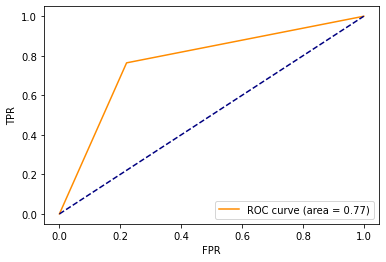

Confusion matrix:
 [[2399 2386]
 [2386 2717]] 

Area under curve = 0.7717833323197307


In [299]:
#ROC curve and the AUC value
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(ypr, yt)
roc_auc = auc(fpr,tpr)
plt.figure()
plt.plot(fpr, tpr,color='darkorange', label='ROC curve (area = %0.2f)'% roc_auc)
plt.plot([0,1],[0,1],linestyle='--',color='navy')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc="lower right")
plt.show()
print("Confusion matrix:\n",confusion_matrix(ypr,predyt),'\n')
print('Area under curve =',roc_auc)

In [300]:
#Saving the results of model
model_result = pd.DataFrame(columns=['Algorithm name','Accuracy f1 score test' ,'CV score','F1-CV score diff',"Area under curve"])
model_result.loc[len(model_result.index)] = ['Logistic regression', acc, cvs, least_diff,roc_auc] 
model_result

,Algorithm name,Accuracy f1 score test,CV score,F1-CV score diff,Area under curve
0,Logistic regression,0.771541,0.763785,0.007756,0.771783


In [301]:
#Decision tree classifier
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(xtr,ytr)
metric_score(model, xtr, xt, ytr, yt, train=True)
metric_score(model, xtr, xt, ytr, yt, train=False)

Accuracy score of train is : 99.99%
Accuracy score of test is : 83.41% 

Classification report:
              precision    recall  f1-score   support

           0       0.84      0.83      0.83      4932
           1       0.83      0.84      0.84      4956

    accuracy                           0.83      9888
   macro avg       0.83      0.83      0.83      9888
weighted avg       0.83      0.83      0.83      9888



In [302]:
ypr = model.predict(xt) 
acc = accuracy_score(yt, ypr)
print('Accuracy score:',acc)

#Cross validation for checking overfitting
from sklearn.model_selection import cross_val_score
CVS = []
for i in range(2,11):
    lsc = cross_val_score(model,x,y,cv=i)
    CVS.append(lsc.mean())
    print('CV score at',i,'=',lsc.mean())
least_diff = min(acc - CVS)
cvs = max(CVS)
print('\nLeast difference of CV score and F1 score of testing is :', least_diff)

Accuracy score: 0.8341423948220065
CV score at 2 = 0.8054330676807314
CV score at 3 = 0.8116647860246178
CV score at 4 = 0.8240031159897888
CV score at 5 = 0.8278866584803095
CV score at 6 = 0.8270977342153959
CV score at 7 = 0.8297684052195188
CV score at 8 = 0.8310624617990469
CV score at 9 = 0.8314874853795123
CV score at 10 = 0.8333482526039571

Least difference of CV score and F1 score of testing is : 0.0007941422180494095


In [303]:
# Hyper parameter tuning for decision tree model
from sklearn.model_selection import GridSearchCV
parameters = {'criterion':["gini", "entropy"],
              'splitter':["best", "random"],
              'max_depth':[4,6,8,10,12],
              'max_features':["auto", "sqrt", "log2"]}
gsv = GridSearchCV(model, parameters)
gsv.fit(xtr,ytr)
print(gsv.best_estimator_)

DecisionTreeClassifier(criterion='entropy', max_depth=12, max_features='log2')


In [324]:
#Training model as per best parameters
model = DecisionTreeClassifier(criterion='entropy',max_depth=12, max_features='log2')
model.fit(xtr,ytr)
metric_score(model, xtr, xt, ytr, yt, train=True)
metric_score(model, xtr, xt, ytr, yt, train=False)

Accuracy score of train is : 86.06%
Accuracy score of test is : 84.88% 

Classification report:
              precision    recall  f1-score   support

           0       0.88      0.81      0.84      4932
           1       0.82      0.89      0.85      4956

    accuracy                           0.85      9888
   macro avg       0.85      0.85      0.85      9888
weighted avg       0.85      0.85      0.85      9888



In [325]:
ypr = model.predict(xt) 
acc = accuracy_score(yt, ypr)
print('Accuracy score:',acc)

#Cross validation for checking overfitting
from sklearn.model_selection import cross_val_score
CVS = []
for i in range(2,11):
    lsc = cross_val_score(model,x,y,cv=i)
    CVS.append(lsc.mean())
    print('CV score at',i,'=',lsc.mean())
least_diff = min(acc - CVS)
cvs = max(CVS)
print('\nLeast difference of CV score and F1 score of testing is :', least_diff)

Accuracy score: 0.8488066343042071
CV score at 2 = 0.8317488571544156
CV score at 3 = 0.8255810511308793
CV score at 4 = 0.840285877775744
CV score at 5 = 0.8440887305680402
CV score at 6 = 0.8418028686674907
CV score at 7 = 0.844109194031985
CV score at 8 = 0.8452818778606523
CV score at 9 = 0.8493882286736494
CV score at 10 = 0.8460707772489879

Least difference of CV score and F1 score of testing is : -0.0005815943694422732


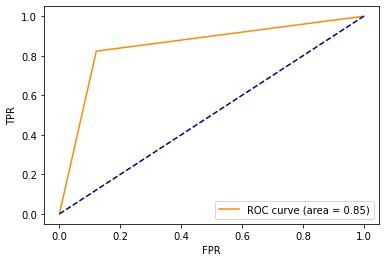

Confusion matrix:
 [[3987  945]
 [ 550 4406]] 

Area under curve = 0.8510860082017551


In [326]:
#ROC curve and the AUC value
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(ypr, yt)
roc_auc = auc(fpr,tpr)
plt.figure()
plt.plot(fpr, tpr,color='darkorange', label='ROC curve (area = %0.2f)'% roc_auc)
plt.plot([0,1],[0,1],linestyle='--',color='navy')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc="lower right")
plt.show()
print("Confusion matrix:\n",confusion_matrix(yt,ypr),'\n')
print('Area under curve =',roc_auc)

In [329]:
#Saving the results of model
model_result.loc[len(model_result.index)] = ['Decision tree classifier', acc, cvs, abs(least_diff), roc_auc] 
model_result

,Algorithm name,Accuracy f1 score test,CV score,F1-CV score diff,Area under curve
0,Logistic regression,0.771541,0.763785,0.007756,0.771783
1,Decision tree classifier,0.848807,0.849388,0.000582,0.851086


In [332]:
#K nearest neighbors classifier
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(xtr,ytr)
metric_score(model, xtr, xt, ytr, yt, train=True)
metric_score(model, xtr, xt, ytr, yt, train=False)

Accuracy score of train is : 88.97%
Accuracy score of test is : 84.59% 

Classification report:
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      4932
           1       0.84      0.86      0.85      4956

    accuracy                           0.85      9888
   macro avg       0.85      0.85      0.85      9888
weighted avg       0.85      0.85      0.85      9888



In [333]:
ypr = model.predict(xt) 
acc = accuracy_score(yt, ypr)
print('Accuracy score:',acc)

#Cross validation for checking overfitting
from sklearn.model_selection import cross_val_score
CVS = []
for i in range(2,11):
    lsc = cross_val_score(model,x,y,cv=i)
    CVS.append(lsc.mean())
    print('CV score at',i,'=',lsc.mean())
least_diff = min(acc - CVS)
cvs = max(CVS)
print('\nLeast difference of CV score and F1 score of testing is :', least_diff)

Accuracy score: 0.845873786407767
CV score at 2 = 0.8225454104130425
CV score at 3 = 0.8290394661853636
CV score at 4 = 0.8354312338976536
CV score at 5 = 0.8383843376759323
CV score at 6 = 0.8402047831943033
CV score at 7 = 0.8397603874586067
CV score at 8 = 0.8419444010169113
CV score at 9 = 0.8415400032689893
CV score at 10 = 0.8437649520062696

Least difference of CV score and F1 score of testing is : 0.0021088344014974503


In [ ]:
# Hyper parameter tuning for KNN model
from sklearn.model_selection import GridSearchCV
parameters = { 'n_neighbors':range(4,10), 
              'weights':['uniform','distance'], 
              'algorithm' :['auto', 'ball_tree', 'kd_tree', 'brute'], 
              'leaf_size':[15,25,30,35]}
gsv = GridSearchCV(model, parameters)
gsv.fit(xtr,ytr)
print(gsv.best_estimator_)

In [335]:
#Training model as per best parameters
model = KNeighborsClassifier()
model.fit(xtr,ytr)
metric_score(model, xtr, xt, ytr, yt, train=True)
metric_score(model, xtr, xt, ytr, yt, train=False)

Accuracy score of train is : 88.97%
Accuracy score of test is : 84.59% 

Classification report:
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      4932
           1       0.84      0.86      0.85      4956

    accuracy                           0.85      9888
   macro avg       0.85      0.85      0.85      9888
weighted avg       0.85      0.85      0.85      9888



In [336]:
ypr = model.predict(xt) 
acc = accuracy_score(yt, ypr)
print('Accuracy score:',acc)

#Cross validation for checking overfitting
from sklearn.model_selection import cross_val_score
CVS = []
for i in range(2,11):
    lsc = cross_val_score(model,x,y,cv=i)
    CVS.append(lsc.mean())
    print('CV score at',i,'=',lsc.mean())
least_diff = min(acc - CVS)
cvs = max(CVS)
print('\nLeast difference of CV score and F1 score of testing is :', least_diff)

Accuracy score: 0.845873786407767
CV score at 2 = 0.8225454104130425
CV score at 3 = 0.8290394661853636
CV score at 4 = 0.8354312338976536
CV score at 5 = 0.8383843376759323
CV score at 6 = 0.8402047831943033
CV score at 7 = 0.8397603874586067
CV score at 8 = 0.8419444010169113
CV score at 9 = 0.8415400032689893
CV score at 10 = 0.8437649520062696

Least difference of CV score and F1 score of testing is : 0.0021088344014974503


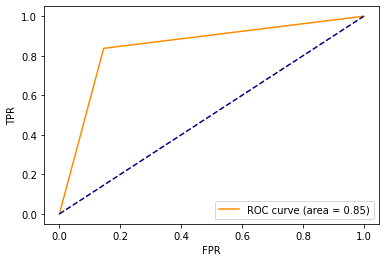

Confusion matrix:
 [[4106  826]
 [ 698 4258]] 

Area under curve = 0.8461169586582384


In [337]:
#ROC curve and the AUC value
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(ypr, yt)
roc_auc = auc(fpr,tpr)
plt.figure()
plt.plot(fpr, tpr,color='darkorange', label='ROC curve (area = %0.2f)'% roc_auc)
plt.plot([0,1],[0,1],linestyle='--',color='navy')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc="lower right")
plt.show()
print("Confusion matrix:\n",confusion_matrix(yt,ypr),'\n')
print('Area under curve =',roc_auc)

In [338]:
#Saving the results of model
model_result.loc[len(model_result.index)] = ['KNN classifier', acc, cvs, abs(least_diff), roc_auc] 
model_result

,Algorithm name,Accuracy f1 score test,CV score,F1-CV score diff,Area under curve
0,Logistic regression,0.771541,0.763785,0.007756,0.771783
1,Decision tree classifier,0.848807,0.849388,0.000582,0.851086
2,KNN classifier,0.845874,0.843765,0.002109,0.846117


In [340]:
#Adaboost classifier
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
model.fit(xtr,ytr)
metric_score(model, xtr, xt, ytr, yt, train=True)
metric_score(model, xtr, xt, ytr, yt, train=False)

Accuracy score of train is : 84.47%
Accuracy score of test is : 84.86% 

Classification report:
              precision    recall  f1-score   support

           0       0.87      0.82      0.84      4932
           1       0.83      0.88      0.85      4956

    accuracy                           0.85      9888
   macro avg       0.85      0.85      0.85      9888
weighted avg       0.85      0.85      0.85      9888



In [341]:
ypr = model.predict(xt) 
acc = accuracy_score(yt, ypr)
print('Accuracy score:',acc)

#Cross validation for checking overfitting
from sklearn.model_selection import cross_val_score
CVS = []
for i in range(2,11):
    lsc = cross_val_score(model,x,y,cv=i)
    CVS.append(lsc.mean())
    print('CV score at',i,'=',lsc.mean())
least_diff = min(acc - CVS)
cvs = max(CVS)
print('\nLeast difference of CV score and F1 score of testing is :', least_diff)

Accuracy score: 0.8486043689320388
CV score at 2 = 0.83191067599822
CV score at 3 = 0.8298284840213425
CV score at 4 = 0.8372517253519375
CV score at 5 = 0.8389102726505303
CV score at 6 = 0.8394767186885642
CV score at 7 = 0.8413380569562384
CV score at 8 = 0.8421871456509704
CV score at 9 = 0.8424097824209003
CV score at 10 = 0.8428748984376586

Least difference of CV score and F1 score of testing is : 0.005729470494380218


In [355]:
# Hyper parameter tuning for adaboost model
from sklearn.model_selection import GridSearchCV
parameters = { 'algorithm':['SAMME', 'SAMME.R'], 
              'n_estimators':[500,1500], 
              'learning_rate' :[0.1, 1], 
              'random_state':[25,50,75]}
gsv = GridSearchCV(model, parameters)
gsv.fit(xtr,ytr)
print(gsv.best_estimator_)

AdaBoostClassifier(learning_rate=0.1, n_estimators=1500, random_state=50)


In [362]:
#Training model as per best parameters
model = AdaBoostClassifier(learning_rate=0.1, n_estimators=1500, random_state=50)
model.fit(xtr,ytr)
metric_score(model, xtr, xt, ytr, yt, train=True)
metric_score(model, xtr, xt, ytr, yt, train=False)

Accuracy score of train is : 84.77%
Accuracy score of test is : 84.96% 

Classification report:
              precision    recall  f1-score   support

           0       0.87      0.82      0.85      4932
           1       0.83      0.88      0.85      4956

    accuracy                           0.85      9888
   macro avg       0.85      0.85      0.85      9888
weighted avg       0.85      0.85      0.85      9888



In [357]:
ypr = model.predict(xt) 
acc = accuracy_score(yt, ypr)
print('Accuracy score:',acc)

#Cross validation for checking overfitting
from sklearn.model_selection import cross_val_score
CVS = []
for i in range(2,11):
    lsc = cross_val_score(model,x,y,cv=i)
    CVS.append(lsc.mean())
    print('CV score at',i,'=',lsc.mean())
least_diff = min(acc - CVS)
cvs = max(CVS)
print('\nLeast difference of CV score and F1 score of testing is :', least_diff)

Accuracy score: 0.8496156957928802
CV score at 2 = 0.8307779440915894
CV score at 3 = 0.8305567191429869
CV score at 4 = 0.8404880858674849
CV score at 5 = 0.842874790553972
CV score at 6 = 0.8437446358801046
CV score at 7 = 0.844432886547844
CV score at 8 = 0.8450998619397259
CV score at 9 = 0.844938172000195
CV score at 10 = 0.845464030235952

Least difference of CV score and F1 score of testing is : 0.004151665556928252


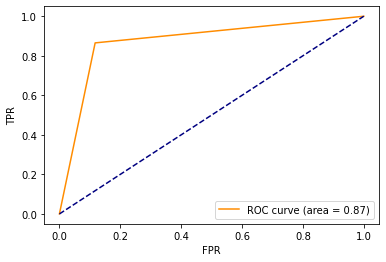

Confusion matrix:
 [[4248  684]
 [ 565 4391]] 

Area under curve = 0.8739156369397741


In [363]:
#ROC curve and the AUC value
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(ypr, yt)
roc_auc = auc(fpr,tpr)
plt.figure()
plt.plot(fpr, tpr,color='darkorange', label='ROC curve (area = %0.2f)'% roc_auc)
plt.plot([0,1],[0,1],linestyle='--',color='navy')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc="lower right")
plt.show()
print("Confusion matrix:\n",confusion_matrix(yt,ypr),'\n')
print('Area under curve =',roc_auc)

In [365]:
#Saving the results of model
model_result.loc[len(model_result.index)] = ['Adaboost classifier', acc, cvs, abs(least_diff), roc_auc] 
model_result

,Algorithm name,Accuracy f1 score test,CV score,F1-CV score diff,Area under curve
0,Logistic regression,0.771541,0.763785,0.007756,0.771783
1,Decision tree classifier,0.848807,0.849388,0.000582,0.851086
2,KNN classifier,0.845874,0.843765,0.002109,0.846117
3,Adaboost classifier,0.873685,0.845464,0.004152,0.873916


In [366]:
#Random forest classifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(xtr,ytr)
metric_score(model, xtr, xt, ytr, yt, train=True)
metric_score(model, xtr, xt, ytr, yt, train=False)

Accuracy score of train is : 99.98%
Accuracy score of test is : 87.41% 

Classification report:
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      4932
           1       0.87      0.89      0.88      4956

    accuracy                           0.87      9888
   macro avg       0.87      0.87      0.87      9888
weighted avg       0.87      0.87      0.87      9888



In [367]:
ypr = model.predict(xt) 
acc = accuracy_score(yt, ypr)
print('Accuracy score:',acc)

#Cross validation for checking overfitting
from sklearn.model_selection import cross_val_score
CVS = []
for i in range(2,11):
    lsc = cross_val_score(model,x,y,cv=i)
    CVS.append(lsc.mean())
    print('CV score at',i,'=',lsc.mean())
least_diff = min(acc - CVS)
cvs = max(CVS)
print('\nLeast difference of CV score and F1 score of testing is :', least_diff)

Accuracy score: 0.8740898058252428
CV score at 2 = 0.8470407378939278
CV score at 3 = 0.8485393749640368
CV score at 4 = 0.8613025608475251
CV score at 5 = 0.865064701188151
CV score at 6 = 0.8671480994960034
CV score at 7 = 0.8685444790744093
CV score at 8 = 0.8704450911873445
CV score at 9 = 0.8707284798583046
CV score at 10 = 0.8706474726117218

Least difference of CV score and F1 score of testing is : 0.0033613259669381668


In [377]:
# Hyper parameter tuning for random forest model
from sklearn.model_selection import GridSearchCV
parameters = { 'n_estimators':[500,1000,1500], 
              'criterion':["gini", "entropy"], 
              'max_depth' :[4, 8, 12, 16], 
              'max_features':["auto", "sqrt", "log2"]}
gsv = GridSearchCV(model, parameters)
gsv.fit(xtr,ytr)
print(gsv.best_estimator_)

RandomForestClassifier(criterion='entropy', max_depth=16, max_features='log2',
                       n_estimators=500)


In [376]:
#Training model as per best parameters
model = RandomForestClassifier(criterion='entropy', max_depth=16, max_features='log2',n_estimators=500)
model.fit(xtr,ytr)
metric_score(model, xtr, xt, ytr, yt, train=True)
metric_score(model, xtr, xt, ytr, yt, train=False)

Accuracy score of train is : 91.38%
Accuracy score of test is : 87.44% 

Classification report:
              precision    recall  f1-score   support

           0       0.90      0.84      0.87      4932
           1       0.85      0.91      0.88      4956

    accuracy                           0.87      9888
   macro avg       0.88      0.87      0.87      9888
weighted avg       0.88      0.87      0.87      9888



In [378]:
ypr = model.predict(xt) 
acc = accuracy_score(yt, ypr)
print('Accuracy score:',acc)

#Cross validation for checking overfitting
from sklearn.model_selection import cross_val_score
CVS = []
for i in range(2,11):
    lsc = cross_val_score(model,x,y,cv=i)
    CVS.append(lsc.mean())
    print('CV score at',i,'=',lsc.mean())
least_diff = min(acc - CVS)
cvs = max(CVS)
print('\nLeast difference of CV score and F1 score of testing is :', least_diff)

Accuracy score: 0.8743932038834952
CV score at 2 = 0.8472834661596342
CV score at 3 = 0.8469816762964574
CV score at 4 = 0.8597852546956203
CV score at 5 = 0.8629405813197218
CV score at 6 = 0.8650442204787319
CV score at 7 = 0.8665820863948266
CV score at 8 = 0.8674512330626074
CV score at 9 = 0.867775027405602
CV score at 10 = 0.8674108542890571

Least difference of CV score and F1 score of testing is : 0.006618176477893201


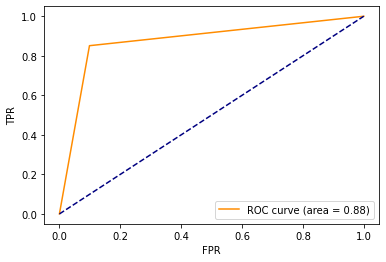

Confusion matrix:
 [[4144  788]
 [ 454 4502]] 

Area under curve = 0.8761505577751814


In [379]:
#ROC curve and the AUC value
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(ypr, yt)
roc_auc = auc(fpr,tpr)
plt.figure()
plt.plot(fpr, tpr,color='darkorange', label='ROC curve (area = %0.2f)'% roc_auc)
plt.plot([0,1],[0,1],linestyle='--',color='navy')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc="lower right")
plt.show()
print("Confusion matrix:\n",confusion_matrix(yt,ypr),'\n')
print('Area under curve =',roc_auc)

In [380]:
#Saving the results of model
model_result.loc[len(model_result.index)] = ['Random forest classifier', acc, cvs, abs(least_diff), roc_auc] 
model_result

,Algorithm name,Accuracy f1 score test,CV score,F1-CV score diff,Area under curve
0,Logistic regression,0.771541,0.763785,0.007756,0.771783
1,Decision tree classifier,0.848807,0.849388,0.000582,0.851086
2,KNN classifier,0.845874,0.843765,0.002109,0.846117
3,Adaboost classifier,0.873685,0.845464,0.004152,0.873916
4,Random forest classifier,0.874393,0.867775,0.006618,0.876151


Decision tree is giving best performance by considering difference b/w F1 score and CV score 

This ensures that there is no overfitting

But by considerin both AUC and F1-CVscore as best deciding parameters, we can choose Adaboost classifier for our predictions

In [381]:
#Prediction using selected best model
model = AdaBoostClassifier(learning_rate=0.1, n_estimators=1500, random_state=50)
model.fit(xtr,ytr)
predyt = model.predict(xt)

In [382]:
table = pd.DataFrame()
table['Actual income'] = ['>=50K' if i==0 else '<50K' for i in yt]
table['Predicted income'] = ['>=50K' if i==0 else '<50K' for i in predyt]
table.sample(10)

,Actual income,Predicted income
6897,>=50K,<50K
3746,>=50K,>=50K
2210,<50K,<50K
3979,<50K,>=50K
9153,>=50K,>=50K
5076,<50K,<50K
3814,>=50K,<50K
9687,>=50K,>=50K
4983,<50K,<50K
4046,>=50K,>=50K


In [383]:
#Saving the model
import pickle
filename='Census_income.pkl'
pickle.dump(model,open(filename,'wb'))